In [8]:
import pandas as pd

# Подготовка данных

In [9]:
train_df = pd.read_csv('fashion-mnist_train.csv')

In [10]:
test_df = pd.read_csv('fashion-mnist_test.csv')

In [14]:
X_train = train_df.loc[:, 'pixel1':]
y_train = train_df.loc[:, :'label']

X_test = test_df.loc[:, 'pixel1':]
y_test = test_df.loc[:, :'label']

In [15]:
import numpy as np

In [16]:
X_train = np.array(X_train.values)
y_train = np.array(y_train.values)

In [17]:
X_test = np.array(X_test.values)
y_test = np.array(y_test.values)

In [18]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float')
X_test = X_test.astype('float')

X_train /= 255
X_test /= 255

In [19]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 1. Логистическая регрессия

In [20]:
regres_model = tf.keras.models.Sequential()

regres_model.add(tf.keras.layers.Dense(10, input_shape=(784,), activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
regres_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [24]:
regres_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0, 
                 callbacks=[tf.keras.callbacks.TensorBoard('./logs/log_regr/')])

In [25]:
loss, regres_accuracy = regres_model.evaluate(X_test, y_test)

print("Logistic Regression, accuracy: {0:.4f}%".format(regres_accuracy * 100))

10000/10000 [==============================] - 0s 18us/sample - loss: 0.4163 - acc: 0.8578
Logistic Regression, accuracy: 85.7800%


c:\users\иван\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


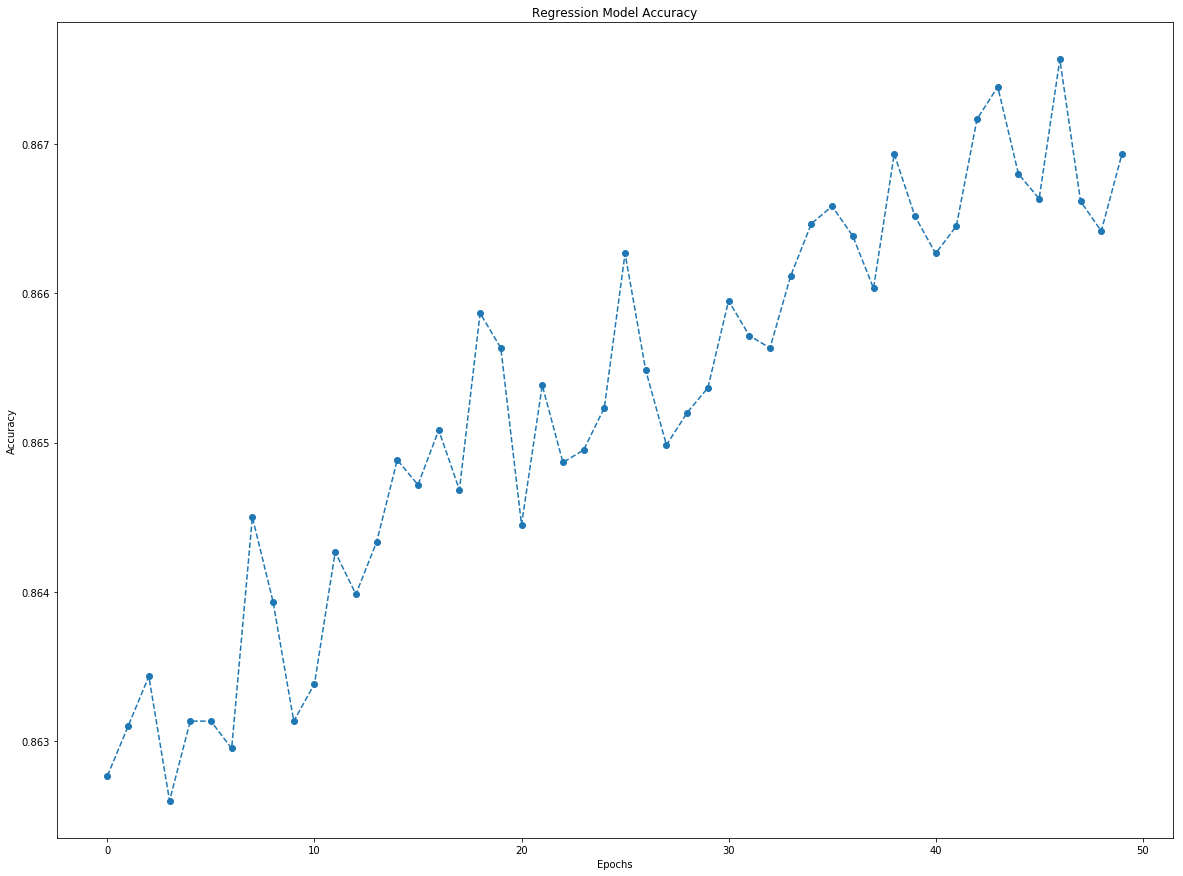

In [27]:
from matplotlib import pyplot as plt

%matplotlib inline

plot_df = pd.read_csv('regres_model_acc.csv')
x, y = plot_df[['Step']].as_matrix(), plot_df[['Value']].as_matrix()
plt.rcParams["figure.figsize"] = [20, 15]
plt.title('Regression Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(x, y, '--o')
plt.show()

# 2. Полносвязная нейронная сеть

In [28]:
full_model = tf.keras.models.Sequential()

full_model.add(tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)))
full_model.add(tf.keras.layers.Dense(512, activation='relu'))
full_model.add(tf.keras.layers.Dense(128, activation='relu'))
full_model.add(tf.keras.layers.Dense(10, activation='softmax'))

full_model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [30]:
full_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 488us/sample - loss: 0.4038 - acc: 0.8531 - val_loss: 0.3818 - val_acc: 0.8586
Epoch 2/10
60000/60000 [==============================] - 29s 491us/sample - loss: 0.3503 - acc: 0.8718 - val_loss: 0.3601 - val_acc: 0.8707
Epoch 3/10
60000/60000 [==============================] - 30s 496us/sample - loss: 0.3235 - acc: 0.8829 - val_loss: 0.3667 - val_acc: 0.8733
Epoch 4/10
60000/60000 [==============================] - 29s 491us/sample - loss: 0.3084 - acc: 0.8882 - val_loss: 0.3480 - val_acc: 0.8740
Epoch 5/10
60000/60000 [==============================] - 30s 494us/sample - loss: 0.2960 - acc: 0.8910 - val_loss: 0.3604 - val_acc: 0.8769
Epoch 6/10
60000/60000 [==============================] - 29s 491us/sample - loss: 0.2879 - acc: 0.8956 - val_loss: 0.3393 - val_acc: 0.8818
Epoch 7/10
60000/60000 [==============================] - 30s 492us/sample - loss: 0.2790 - acc: 0.8991 

In [33]:
loss, full_accuracy = full_model.evaluate(X_test, y_test)

print("Fully-Connected neural network, accuracy: {0:.4}%".format(full_accuracy * 100))

10000/10000 [==============================] - 1s 65us/sample - loss: 0.3393 - acc: 0.8902
Fully-Connected neural network, accuracy: 89.02%


Качество полносвязной нейронной сети на 3,3% выше, чем у линейной регресси. Это можно объяснить тем, что полносвязная нейронная сеть по своей сути является нелинейной моделью, которая может автоматически извлекать признаки из предложенных данных.

# 3. Сверточная нейронная сеть

In [34]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [35]:
conv_model = tf.keras.models.Sequential()

conv_model.add(tf.keras.layers.Convolution2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
conv_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
conv_model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'))
conv_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
conv_model.add(tf.keras.layers.Flatten())
conv_model.add(tf.keras.layers.Dense(128, activation='relu'))
conv_model.add(tf.keras.layers.Dense(64, activation='relu'))
conv_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [36]:
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
conv_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 482us/sample - loss: 0.4627 - acc: 0.8307 - val_loss: 0.3084 - val_acc: 0.8887
Epoch 2/10
60000/60000 [==============================] - 28s 463us/sample - loss: 0.3028 - acc: 0.8897 - val_loss: 0.2690 - val_acc: 0.9022
Epoch 3/10
60000/60000 [==============================] - 28s 467us/sample - loss: 0.2550 - acc: 0.9065 - val_loss: 0.2469 - val_acc: 0.9077
Epoch 4/10
60000/60000 [==============================] - 28s 471us/sample - loss: 0.2236 - acc: 0.9164 - val_loss: 0.2493 - val_acc: 0.9097
Epoch 5/10
60000/60000 [==============================] - 28s 470us/sample - loss: 0.1988 - acc: 0.9256 - val_loss: 0.2388 - val_acc: 0.9145
Epoch 6/10
60000/60000 [==============================] - 27s 455us/sample - loss: 0.1791 - acc: 0.9330 - val_loss: 0.2367 - val_acc: 0.9166
Epoch 7/10
60000/60000 [==============================] - 28s 462us/sample - loss: 0.1586 - acc: 0.9401 

In [38]:
loss, conv_accuracy = conv_model.evaluate(X_test, y_test)

print("Convolutional neural network, accuracy: {0:.4}%".format(conv_accuracy * 100))

10000/10000 [==============================] - 1s 145us/sample - loss: 0.2750 - acc: 0.9239
Convolutional neural network, accuracy: 92.39%


В результате качество сверточной нейронной сети по сравнению с полносвязной увеличилось на 3,4%.

Добавим Batch Normalization слои в нашу модель после сверточных слоев и Dropout слои после полносвязных слоев.

In [44]:
conv_model = tf.keras.models.Sequential()

conv_model.add(tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
conv_model.add(tf.keras.layers.BatchNormalization())
conv_model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
conv_model.add(tf.keras.layers.BatchNormalization())
conv_model.add(tf.keras.layers.MaxPooling2D((2,2)))

conv_model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
conv_model.add(tf.keras.layers.BatchNormalization())
conv_model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
conv_model.add(tf.keras.layers.BatchNormalization())
conv_model.add(tf.keras.layers.MaxPooling2D((2,2)))

conv_model.add(tf.keras.layers.Flatten())
conv_model.add(tf.keras.layers.Dense(128, activation='relu'))
conv_model.add(tf.keras.layers.Dropout(0.5))
conv_model.add(tf.keras.layers.Dense(64, activation='relu'))
conv_model.add(tf.keras.layers.Dropout(0.3))
conv_model.add(tf.keras.layers.Dense(32, activation='relu'))
conv_model.add(tf.keras.layers.Dropout(0.1))
conv_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [45]:
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
conv_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 223s 4ms/sample - loss: 0.7189 - acc: 0.7452 - val_loss: 0.3662 - val_acc: 0.8685
Epoch 2/10
60000/60000 [==============================] - 219s 4ms/sample - loss: 0.4286 - acc: 0.8546 - val_loss: 0.3032 - val_acc: 0.8929
Epoch 3/10
60000/60000 [==============================] - 219s 4ms/sample - loss: 0.3614 - acc: 0.8786 - val_loss: 0.2640 - val_acc: 0.9041
Epoch 4/10
60000/60000 [==============================] - 218s 4ms/sample - loss: 0.3237 - acc: 0.8920 - val_loss: 0.2467 - val_acc: 0.9107
Epoch 5/10
60000/60000 [==============================] - 219s 4ms/sample - loss: 0.2958 - acc: 0.9011 - val_loss: 0.2380 - val_acc: 0.9128
Epoch 6/10
60000/60000 [==============================] - 219s 4ms/sample - loss: 0.2731 - acc: 0.9088 - val_loss: 0.2339 - val_acc: 0.9178
Epoch 7/10
60000/60000 [==============================] - 219s 4ms/sample - loss: 0.2591 - acc: 0.9138 - val_l

In [53]:
conv_model.save('my_model.h5')

conv_model = tf.keras.models.load_model('my_model.h5')

In [54]:
loss, conv_accuracy = conv_model.evaluate(X_test, y_test)

print("Convolutional neural network, accuracy: {0:.4}%".format(conv_accuracy * 100))

10000/10000 [==============================] - 5s 491us/sample - loss: 0.2236 - acc: 0.9216
Convolutional neural network, accuracy: 92.16%


Качество модели слегка ухудшилось, скорее всего это произошло из-за использования Dropout слоев. Таким образом, лучшее качество, которого удалось достигнуть составляет 92.39%.